In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Extract_Inversion_Tem import extract_inversion_tem
from Extract_Observation_Tem import extract_observation_tem

In [13]:
years = ['2009']
i_tem = extract_inversion_tem(years)

In [14]:
o_tem = extract_observation_tem(years)

def trans_time(i):
    if i[-2:] == '00':
        m = '08'
    elif i[-2:] == '12':
        m = '20'
    return i[:-2] + m
o_tem.index = [trans_time(i) for i in o_tem.index]
o_tem.columns = i_tem.columns

In [15]:
print(o_tem.shape)
print(i_tem.shape)

(730, 47)
(641, 47)


In [16]:
for i in i_tem.index:
    if i[-2:] == '08':
        i_tem.drop(i, inplace=True)

In [17]:
def MSE(y, t):
    return np.sum((y - t)**2)**0.5

def MSE1(x):
    return  np.sum(x**2)/len(x)

def MAE1(x):
    return np.sum(np.abs(x))/len(x)

In [18]:
data = pd.DataFrame(columns=i_tem.columns)

for i in i_tem.index:
    if i in o_tem.index:
        # print(o_tem.loc[i])
        # print(i_tem.loc[i])
        # print(o_tem.loc[i] - i_tem.loc[i])
        # print(MSE(o_tem.loc[i], i_tem.loc[i]))
        data.loc[i] = o_tem.loc[i] - i_tem.loc[i]

In [19]:
for i in data.columns:
    # print(MSE1(data[i]).round(2), MAE1(data[i]).round(4))
    data.loc['mse', i] = MSE1(data[i]).round(2)
    data.loc['mae', i] = MAE1(data[i]).round(4)

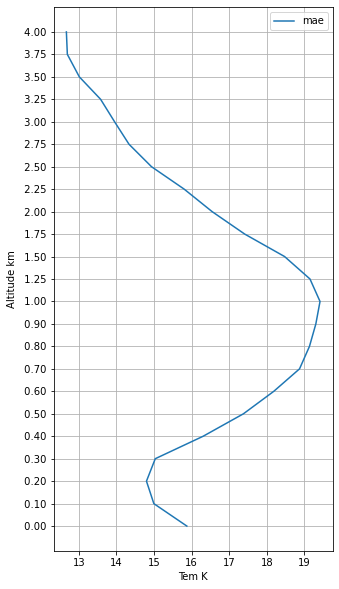

In [27]:

plt.figure(figsize=(5,10))
Height = data.columns[0:23]
# plt.plot(data.loc['mse'][0:23], Height, label='mse')
plt.plot(data.loc['mae'][0:23], Height, label='mae')
plt.xlabel('Tem K')
plt.ylabel('Altitude km')
plt.legend()
plt.grid()

path = r'I:\Data\Personal_Data\graduation_project\Graduation_thesis\Atlas\Chapter3\\'
plt.savefig(path+'tem_mae20.png', bbox_inches = 'tight')
plt.show()

In [25]:
data.loc['mse'][0:23]

 0.00    248.50
 0.10    227.14
 0.20    225.78
 0.30    233.50
 0.40    266.54
 0.50    295.61
 0.60    320.42
 0.70    341.42
 0.80    348.09
 0.90    352.70
 1.00    355.56
 1.25    343.82
 1.50    319.02
 1.75    284.96
 2.00    259.37
 2.25    238.90
 2.50    216.67
 2.75    200.74
 3.00    191.41
 3.25    181.38
 3.50    168.06
 3.75    160.73
 4.00    160.67
Name: mse, dtype: float64